L'objectif du TP est :

- d'implémenter l'estimation du flot optique par la méthode de Lucas-Kanade : l'estimation se fera uniquement en certains points de l'image, obtenus grâce à la fonction cv.goodFeaturesToTrack

- d'utiliser une fonction de OpenCV pour l'estimation dense du flot optique cv.calcOpticalFlowFarneback

- de comparer les 2 estimations obtenues.

On appliquera l'estimation de mouvement entre les 2 images ci-dessous, et on l'affichera soit sous forme de champ de vecteurs ou comme une image HSV.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import timeit

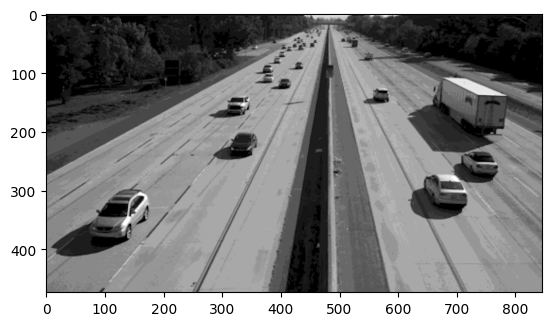

In [49]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
plt.imshow(img1,cmap='gray')

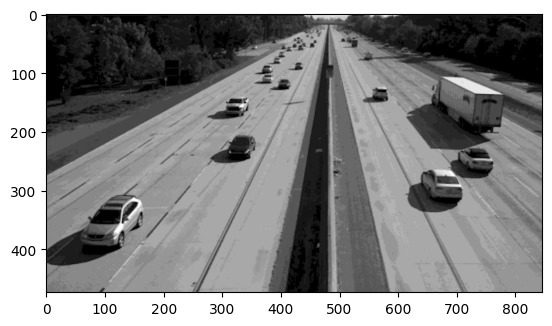

In [50]:
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(img2,cmap='gray')

In [51]:
corner1=cv.goodFeaturesToTrack(img1,maxCorners=500, qualityLevel=0.03, minDistance=1)
corner2=cv.goodFeaturesToTrack(img2,maxCorners=500, qualityLevel=0.03, minDistance=1)
corner1=corner1.astype(int)
corner1=corner1.reshape((len(corner1), 2))
corner2=corner2.astype(int)
corner2=corner2.reshape((len(corner2), 2))

In [13]:
# corner1=list(corner1)
# temp=[]
# for point in corner1:
#     x, y = point
#     if img1.shape[0]<x or img1.shape[1]<y:
#         temp.append(point)
# corner1=np.array(temp)

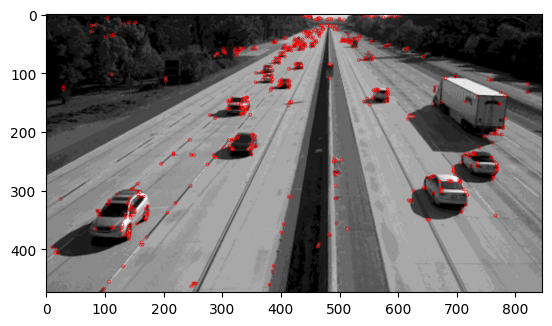

In [52]:
img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
for i in corner1: cv.circle(img1,center=(i[0],i[1]),radius=3,color=[255,0,0],thickness=1)
plt.imshow(img1,cmap='gray')

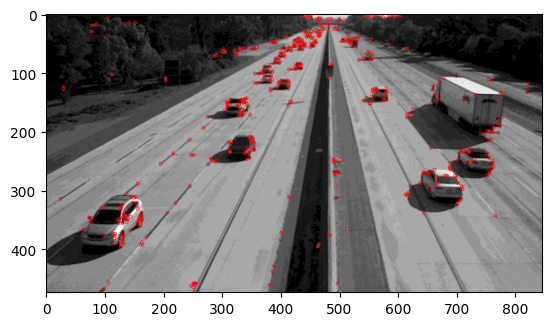

In [53]:
img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
for i in corner2: cv.circle(img2,center=(i[0],i[1]),radius=3,color=[255,0,0],thickness=1)
plt.imshow(img2,cmap='gray')

In [9]:
u=flow[:,0]
v=flow[:,1]

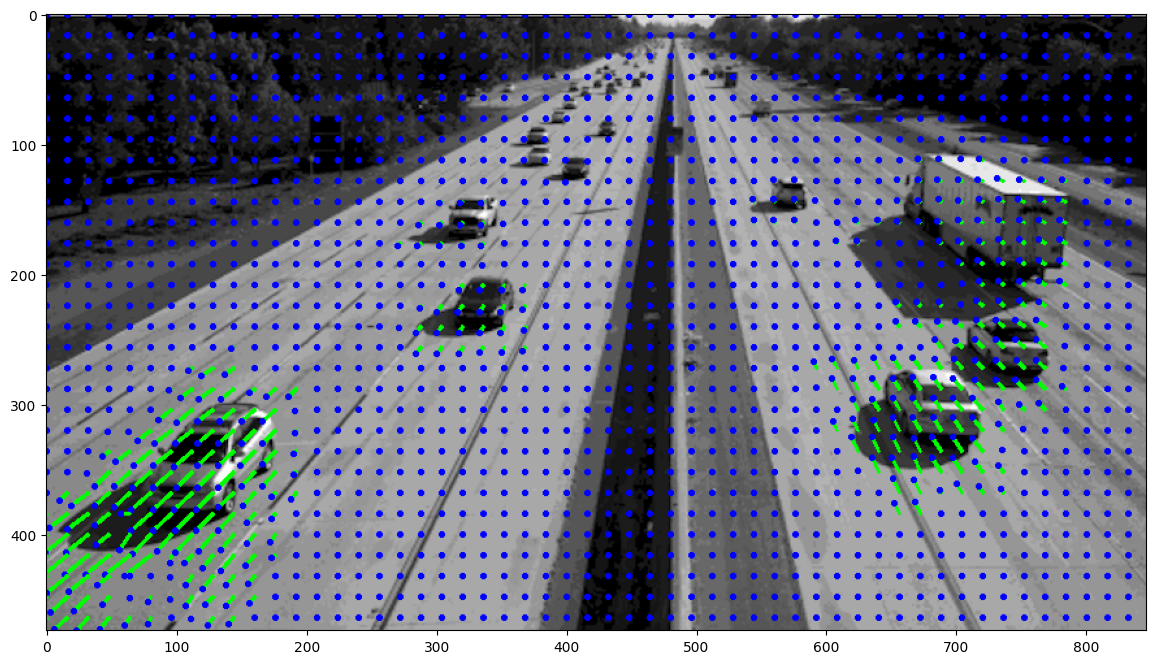

In [32]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
def visualize_flow_with_arrows(image1, image2, step=16, scale=1.0):
    flow = cv.calcOpticalFlowFarneback(image1, image2, None, 0.5, 3, 15, 3, 5, 1, 0)
    vis = cv.cvtColor(image1, cv.COLOR_GRAY2BGR)
    h, w = image1.shape
    plt.figure(figsize=(16,8))
    for y in range(0, h, step):
        for x in range(0, w, step):
            fx, fy = flow[y, x]
            endx, endy = x + int(fx*scale), y + int(fy*scale)
            # Draw the line
            cv.line(vis, (x, y), (endx, endy), (0, 255, 0), 2)
            # Draw the arrow head
            cv.circle(vis, (endx, endy), 1, (0, 0, 255), 2)

    plt.imshow(vis)
visualize_flow_with_arrows(img1, img2, step=16, scale=1.0)

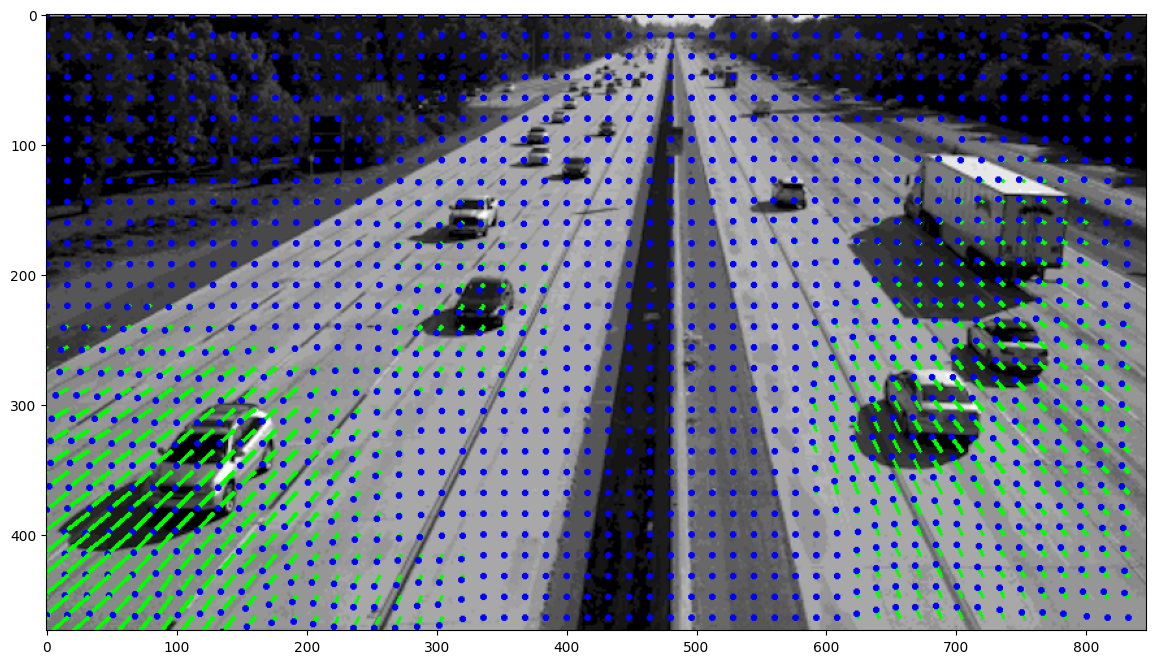

In [22]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
def visualize_flow_with_arrows(image1, image2, step=16, scale=1.0):
    flow = cv.calcOpticalFlowFarneback(image1, image2, None, 0.5, 3, 55, 3, 5, 1, 0)
    vis = cv.cvtColor(image1, cv.COLOR_GRAY2BGR)
    h, w = image1.shape
    plt.figure(figsize=(16,8))
    for y in range(0, h, step):
        for x in range(0, w, step):
            fx, fy = flow[y, x]
            endx, endy = x + int(fx*scale), y + int(fy*scale)
            # Draw the line
            cv.line(vis, (x, y), (endx, endy), (0, 255, 0), 2)
            # Draw the arrow head
            cv.circle(vis, (endx, endy), 1, (0, 0, 255), 2)

    plt.imshow(vis)
visualize_flow_with_arrows(img1, img2, step=16, scale=1.0)

In [20]:
%%time
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
flow = cv.calcOpticalFlowFarneback(img1, img1, None, 0.5, 3, 15, 3, 5, 1, 0)

CPU times: user 118 ms, sys: 7.92 ms, total: 126 ms
Wall time: 108 ms


In [21]:
%%time
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
flow = cv.calcOpticalFlowFarneback(img1, img1, None, 0.5, 3, 55, 3, 5, 1, 0)

CPU times: user 125 ms, sys: 953 µs, total: 126 ms
Wall time: 109 ms


# On voit que si on augmente si on augmente le nombre d'iteration la precision de l'estimation augmente mais le temps d'execution de la methode augmente aussi donc y'a un compromis

# Ma methode

In [33]:
from scipy import signal 
def flow_optique(img1,img2):
        corner1=cv.goodFeaturesToTrack(img1,maxCorners=500, qualityLevel=0.03, minDistance=10)
        corner1=corner1.astype(int)
        corner1=corner1.reshape((len(corner1), 2))
        gradienx=signal.convolve2d(img1,[[-1,1],[-1,1]],"same")+signal.convolve2d(img2,[[-1,1],[-1,1]],"same")
        gradieny=signal.convolve2d(img1,[[-1,-1],[1,1]],"same")+signal.convolve2d(img2,[[-1,-1],[1,1]],"same")
        A=[]
        b=[]
        v=np.zeros((img1.shape[0],img1.shape[1],2))
        for i in corner1:
            voisins=[(i[0]+k,i[1]+l) for k in [-1,1,0] for l in [-1,1,0] if k*l+k+l!=0]
            for voisin in voisins:
                A.append([gradienx[voisin[1],voisin[0]],gradieny[voisin[1],voisin[0]]])
                b.append((img2-img1)[voisin[1],voisin[0]])
            A=np.array(A)
            b=np.array(b)
            v[i[1],i[0]]=np.linalg.inv(A.T@A)@A.T@b
            b=[]
            A=[]
        return v

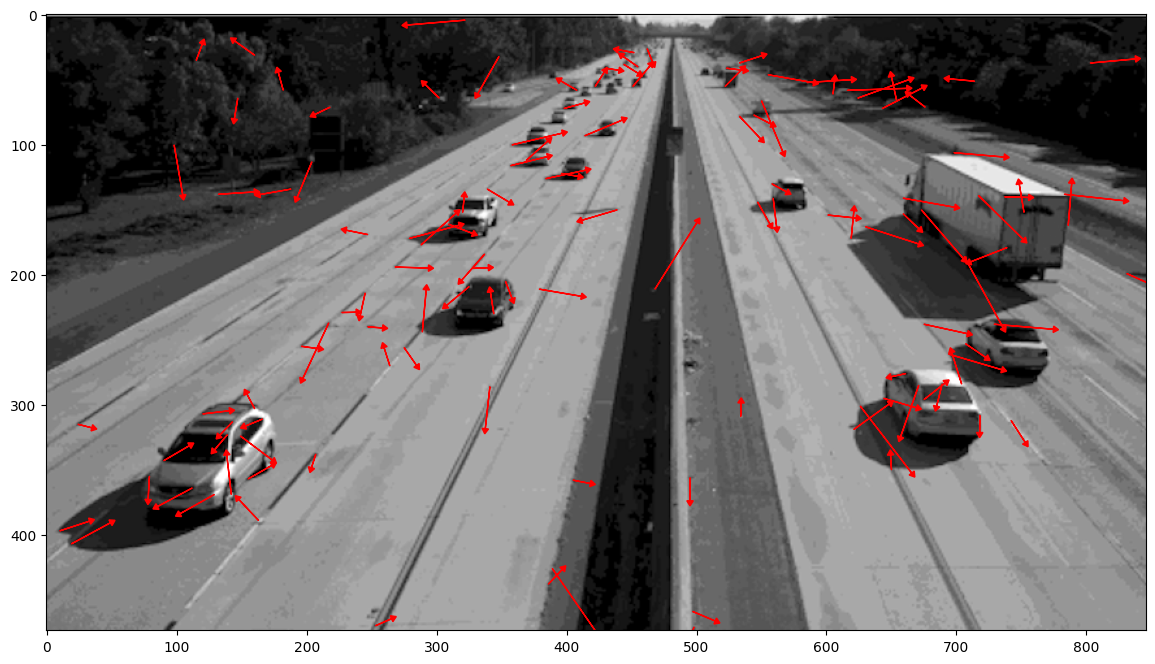

In [34]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
v=flow_optique(img1,img2)
plt.figure(figsize=(16,8))
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if abs(v[i,j][0])>1 or abs(v[i,j][1])>1:
            plt.arrow(j,i,10*v[i,j][0],10*v[i,j][1], head_width = 5, head_length = 4, color = "r")
plt.imshow(img1,cmap='gray')

In [26]:
gradienx=signal.convolve2d(img1,[[-1,1],[-1,1]],"same")+signal.convolve2d(img2,[[-1,1],[-1,1]],"same")
gradienx

array([[-480,    0,    0, ...,    0,    0,    0],
       [-722,    0,    0, ...,   -4,   -2,    0],
       [-242,    0,    0, ...,   -4,   -2,    0],
       ...,
       [-484,   -3,   15, ...,    0,    0,    0],
       [-476,   -2,    6, ...,    0,    0,    0],
       [-472,    0,    0, ...,    0,    0,    0]])

In [27]:
gradieny=signal.convolve2d(img1,[[-1,-1],[1,1]],"same")+signal.convolve2d(img2,[[-1,-1],[1,1]],"same")
gradieny

array([[-480, -960, -960, ..., -960, -960, -960],
       [ 238,  476,  476, ...,  464,  458,  456],
       [ 242,  484,  484, ...,  496,  502,  504],
       ...,
       [   4,    7,    3, ...,    0,    0,    0],
       [   4,   10,    6, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

In [28]:
img2-img1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Ça na pas bien marche on voit des fleches partout sur l'image. Je pense que c'est l'ordre de grandeur qui pose probleme entre la matrice de gradient et la matrice de la difference des imges(la derivee de l'image par rapport au temps)

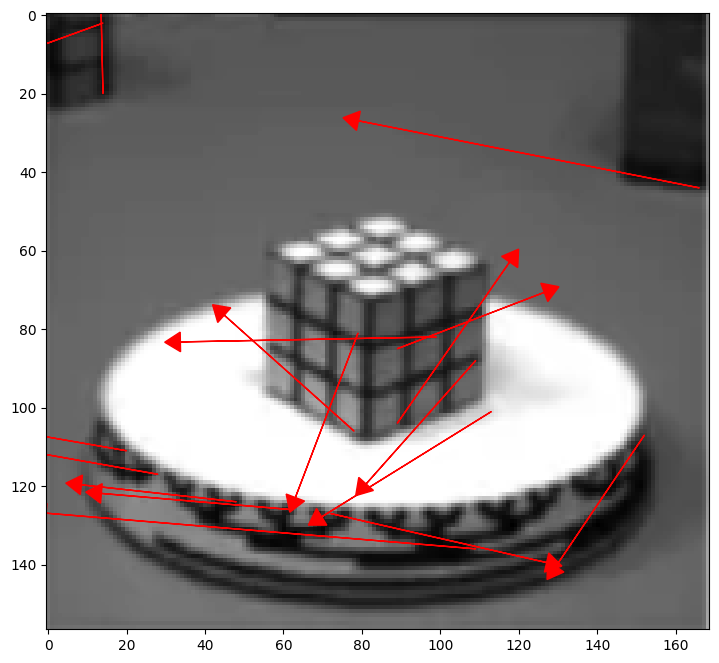

In [50]:
img1=cv.imread('rubik/rub1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('rubik/rub2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
v=flow_optique(img1,img2)
plt.figure(figsize=(16,8))
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if abs(v[i,j][0])>2 or abs(v[i,j][1])>2:
            plt.arrow(j,i,10*v[i,j][0],10*v[i,j][1], head_width = 5, head_length = 4, color = "r")
plt.imshow(img1,cmap='gray')

# Pareil aussi estimation non satisfaisante

# Utilisation d image sythetique

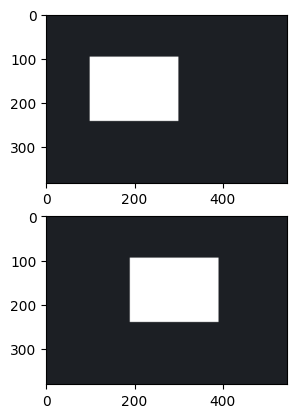

In [47]:
img1=cv.imread('image11.png')
img2=cv.imread('image12.png')
fig,axes=plt.subplots(2,1)
axes[0].imshow(img1,cmap='gray')
axes[1].imshow(img2,cmap='gray')

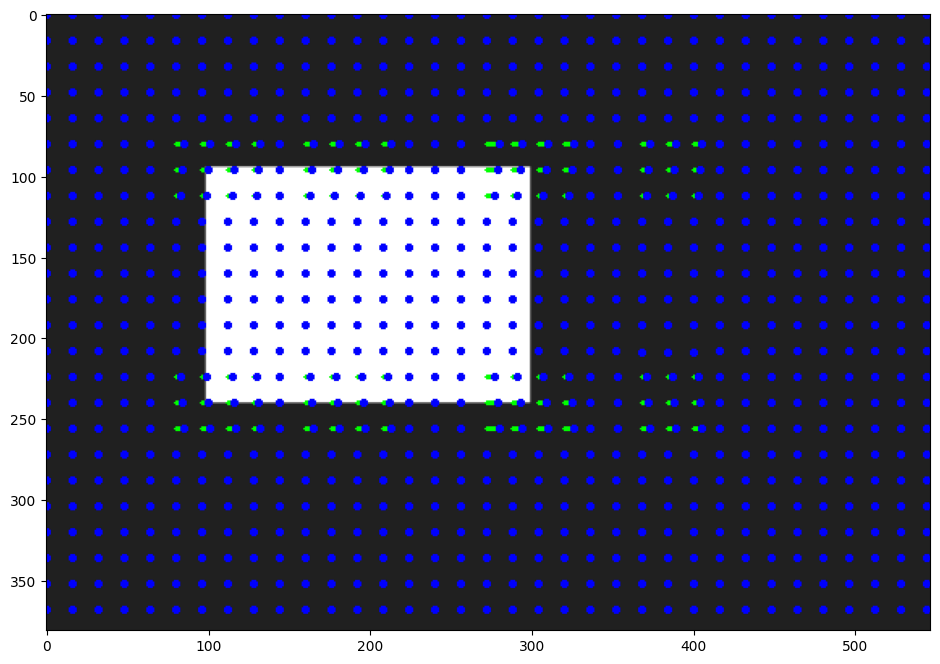

In [49]:
img1=cv.imread('image11.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('image12.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
def visualize_flow_with_arrows(image1, image2, step=16, scale=1.0):
    flow = cv.calcOpticalFlowFarneback(image1, image2, None, 0.5, 3, 55, 3, 5, 1, 0)
    vis = cv.cvtColor(image1, cv.COLOR_GRAY2BGR)
    h, w = image1.shape
    plt.figure(figsize=(16,8))
    for y in range(0, h, step):
        for x in range(0, w, step):
            fx, fy = flow[y, x]
            endx, endy = x + int(fx*scale), y + int(fy*scale)
            # Draw the line
            cv.line(vis, (x, y), (endx, endy), (0, 255, 0), 2)
            # Draw the arrow head
            cv.circle(vis, (endx, endy), 1, (0, 0, 255), 2)

    plt.imshow(vis)
visualize_flow_with_arrows(img1, img2, step=16, scale=1.0)

# L'estimation est pas mal avec la methode predefinie

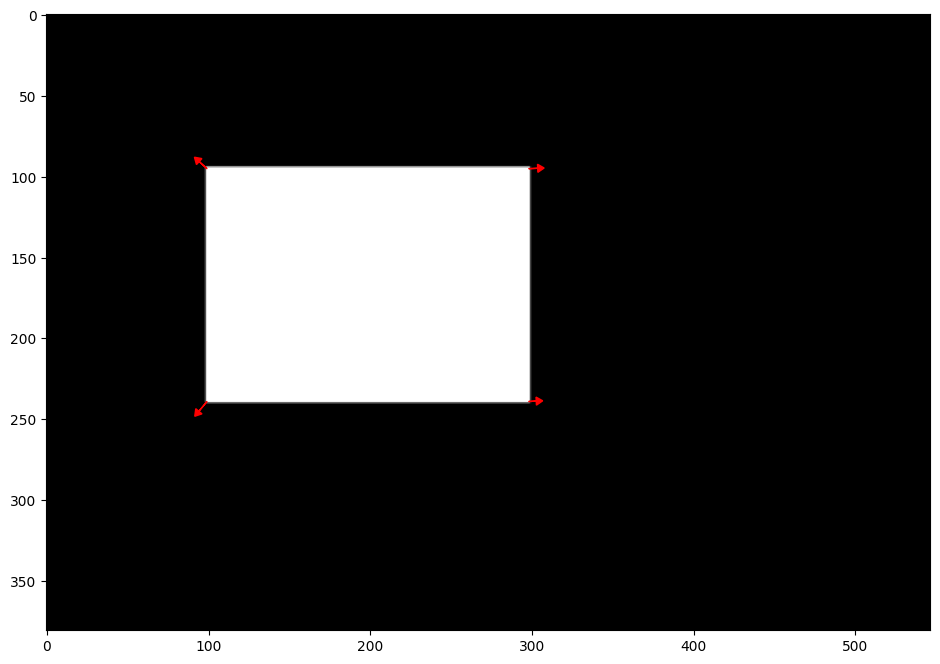

In [48]:
img1=cv.imread('image11.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2=cv.imread('image12.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
v=flow_optique(img1,img2)
plt.figure(figsize=(16,8))
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if abs(v[i,j][0])>0.01 or abs(v[i,j][1])>0.01:
            plt.arrow(j,i,10*v[i,j][0],10*v[i,j][1], head_width = 5, head_length = 4, color = "r")
plt.imshow(img1,cmap='gray')

# On voit que lobjet de l'image s'est deplacé vers la droite alors que la methode estime que l'objet se deplace presque dans les deux sens. Mais on peut remarquer que puisse que l'objet se deplace de maniere horizontale on aura pas de gradien au niveau vertical donc ça peut biaiser l'estimation du mouvement